In [1]:
import sys
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import numpy as np
import ot
import time
import numba as nb
import numpy as np
print(os.getcwd())
os.chdir('/home/baly/projects/sliced_opt')
from sopt.library import *
from sopt.lib_ot import * 
import pot1d

/home/baly/projects/sliced_opt/code/sopt


In [2]:
@nb.njit(['float64[:,:](float64[:],float64[:])','float32[:,:](float32[:],float32[:])'],fastmath=True)
def cost_matrix(X,Y):
    '''
    input: 
        X: (n,) float np array
        Y: (m,) float np array
    output:
        M: n*m matrix, M_ij=c(X_i,Y_j) where c is defined by cost_function.
    
    '''
    XT=np.expand_dims(X,1)
    M=(XT-Y)**2
    return M

In [3]:
n=int(5e4)
X=np.random.uniform(-20,20,size=n)
Y=X.copy()+0.01
Lambda=100.0
X.sort()
Y.sort()
time_start=time.time()
pot1d.solve(X,Y,Lambda)
time_end=time.time()
print('case 1',time_end-time_start)

Y=2*Y
time_start=time.time()
pot1d.solve(X,Y,Lambda)
time_end=time.time()
print('case 2',time_end-time_start)



case 1 10.48372507095337
case 2 4.029693603515625


In [7]:
n=int(1e4)
X=np.random.uniform(-20,20,size=n)
Y=X.copy()+0.01
Lambda=100.0
X.sort()
Y.sort()
time_start=time.time()
M=cost_matrix(X,Y)
pot(M)
time_end=time.time()
print('case 1',time_end-time_start)

Y=2*Y
time_start=time.time()
M=cost_matrix(X,Y)
pot(M)
time_end=time.time()
print('case 2',time_end-time_start)


case 1 0.47738075256347656
case 2 1.022550106048584


In [32]:
time_end-time_start

1.006753921508789

In [47]:
pi=np.array([[1,2],[3,4]])
pi.reshape(-1)
X=np.random.rand(2)
Y=np.random.rand(3)
M=cost_matrix(X,Y)
mu=np.ones(3)/3
nu=np.ones(2)/2
eps=1

In [85]:
n,m=M.shape
c=M.reshape(-1) # this is the object function 
margin1=(np.ones((1,1,m))*(np.eye(n).reshape(n,n,1))).reshape(n,n*m)
margin2=(np.eye(m).reshape((m,m,1))*np.ones((1,1,n))).reshape(m,n*m)

A=np.vstack((margin1,margin2,-margin1,-margin2,-np.eye(n*m)))


b=np.concatenate((mu,nu,-mu,-nu,np.zeros(n*m)))

A_x=matrix(A)
b_x=matrix(b)
c_x=matrix(c)
sol=solvers.lp(c_x,A_x,b_x)
pi=sol['x']
#pi=pi.reshape((n,m))
#print(pi)

     pcost       dcost       gap    pres   dres   k/t
 0:  5.3930e-02  5.3930e-02  2e+01  4e+00  3e+00  1e+00
 1:  4.4929e-02  5.0550e-02  2e+00  6e-01  4e-01  2e-01
 2:  1.0468e-01  3.2809e+00  1e+02  1e+00  1e+00  4e+00
 3:  1.0618e-01  3.1426e+02  1e+04  1e+00  9e-01  3e+02
 4:  1.0618e-01  3.1437e+04  1e+06  1e+00  9e-01  3e+04
 5:  1.0618e-01  3.1438e+06  1e+08  1e+00  9e-01  3e+06
 6:  1.0618e-01  3.1438e+08  1e+10  1e+00  9e-01  3e+08
Certificate of primal infeasibility found.


In [84]:
sol

{'x': None,
 'y': <0x1 matrix, tc='d'>,
 's': None,
 'z': <16x1 matrix, tc='d'>,
 'status': 'primal infeasible',
 'gap': None,
 'relative gap': None,
 'primal objective': None,
 'dual objective': 1.0,
 'primal infeasibility': None,
 'dual infeasibility': None,
 'primal slack': None,
 'dual slack': 2.468128289889089,
 'residual as primal infeasibility certificate': 3.555305106472472e-09,
 'residual as dual infeasibility certificate': None,
 'iterations': 6}

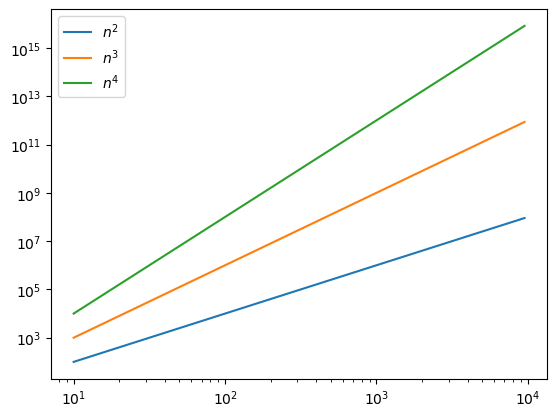

In [68]:
n_list=np.arange(10,10000,500)
fig = plt.figure()
ax = plt.subplot(111)

ax.loglog(n_list,n_list**2,label='$n^2$')
ax.loglog(n_list,n_list**3,label='$n^3$')
ax.loglog(n_list,n_list**4,label='$n^4$')
ax.legend()
plt.show()


In [86]:
pot1d.solve

NameError: name 'pot1d' is not defined